In [5]:
#importing everything I will need
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
from __future__ import print_function

In [6]:
#defining variables 
steps = 900000
M = []
pp = []
p = 0
h = 6.626e-34
k = 1.38e-23
lambda0 = 671e-9
mass = 1.16e-26
A21 = 4.27e7
c = 3e8
p0 = h/lambda0
nu0 = c/lambda0
nu1 = nu0 - (A21/(np.pi))
lambda1 = (c/nu1)
v = 0
phi_sat = 5*((A21*2*np.pi) / (lambda0*lambda0))
print(p0)

9.874813710879284e-28


[-33.15 -29.45 -25.75 -22.05 -18.35 -14.65 -10.95  -7.25  -3.55   0.15
   3.85   7.55  11.25  14.95  18.65  22.35  26.05  29.75  33.45  37.15]


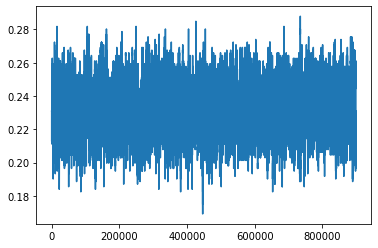

In [7]:
for i in range(steps):
    sigma_plus = ((lambda1*lambda1)*(A21*A21)) / ((8*np.pi) * ((A21*A21) / 4) + (4*np.pi*np.pi * (nu0 + (v/lambda1) - nu1)*(nu0 + (v/lambda1) - nu1)))
    sigma_minus = ((lambda1*lambda1)*(A21*A21)) / ((8*np.pi) * ((A21*A21) / 4) + (4*np.pi*np.pi * (nu0 - (v/lambda1) - nu1)*(nu0 - (v/lambda1) - nu1)))
    P_plus = ((phi_sat*sigma_plus) / (A21 + 2*(phi_sat*sigma_plus + phi_sat*sigma_minus)))
    P_minus = ((phi_sat*sigma_minus) / (A21 + 2*(phi_sat*sigma_plus + phi_sat*sigma_minus)))
    Q = random.random()
    if Q < P_plus:
        p += 1
    if Q > (1-P_minus):
        p -= 1
    M.append(p)
    pp.append(P_plus)
    v = (p*p0)/mass

#plt.hist(M, bins = 20)

y, edges = np.histogram(M, bins=20)
centers = 0.5*(edges[1:]+ edges[:-1])
ydata = y
xdata = centers
print (centers)
plt.plot(pp)

[1.57367668e+05 1.44671386e+02]


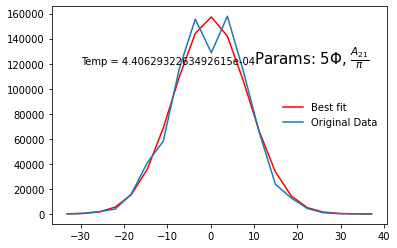

In [8]:
def func(x, A, B):
    return A*np.exp(-(x)**2/B)
popt, pcov = curve_fit(func, xdata, ydata)
print (popt)
temp = popt[1]*p0**2/(2*mass*k)
ym = func(xdata, popt[0], popt[1])
plt.plot(xdata, ym, c='r', label='Best fit')
plt.plot(xdata,ydata, label='Original Data')
plt.text(-30, 120000, 'Temp = {0}'.format(np.format_float_scientific(temp)))
plt.text(10, 120000, r'Params: $5\Phi$, $\frac{A_{21}}{\pi}$', fontsize=15)
plt.show
plt.legend(loc = 7, frameon=False)
plt.savefig('HW9_4')